# Data-analytiikan osaaja

## Koulutus: 13.2.2020-14.2.2020

# Aihe: klusterointi k-means -algoritmillä

Lataa seuraava tiedosto: THL_MyData2016_hackathon_dataset.xls Datasta kerrotaan enemmän THL:n kotisivuilla osoitteessa: https://thl.fi/en/web/thlfi-en/statistics/statistical-databases/open-data/thl-and-hackathons 
    
Valitse ne sarakkeet joissa on numeerisia arvoja. Voit valita Pandas DataFrame muuttujasta my_frame sarakkeet 'a' ja 'b' seuraavalla komennolla:

another_dataframe = my_frame[['a','b']]

In [1]:
import pandas as pd

In [2]:
health_data = pd.read_excel("THL_MyData2016_hackathon_dataset.xls")

In [3]:
type(health_data)

pandas.core.frame.DataFrame

In [4]:
health_data.columns

Index(['ikalk', 'sp', 'bmi', 'systbp2', 'diastbp2', 'kol', 'kol_hdl',
       'Fx_plus', 'Fx'],
      dtype='object')

In [5]:
numeric_health_data = health_data[['bmi','systbp2', 'diastbp2','kol','kol_hdl']]

In [6]:
type(numeric_health_data)

pandas.core.frame.DataFrame

In [24]:
numeric_health_data.describe()

,bmi,systbp2,diastbp2,kol,kol_hdl
count,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000
mean,27.109074,132.042912,78.334268,5.270606,1.482348
std,4.506711,17.805731,10.534951,0.995119,0.362748
min,16.530000,88.000000,45.770000,2.550000,0.700000
25%,23.940000,120.000000,72.000000,4.567500,1.220000
50%,26.540000,130.000000,78.000000,5.235000,1.440000
75%,29.707500,142.000000,86.000000,5.912500,1.710000
max,45.180000,200.630000,109.370000,8.830000,2.850000


Harjoitus 1. Tee klusterointimalli terveysdatan numeerisista arvoista. Jokainen rivi on nyt henkilö, jonka terveyttä kuvaavat arvot ovat vaakavektorissa. 

Ennen kuin klusteroit, normalisoi joka sarake niin, että sarakkeen keskiarvo on 0 vähentämällä jokaisesta arvosta sarakkeen keskiarvo. Sen jälkeen jaa kaikki sarakkeen arvot sarakkeen keskihajonnalla. Näin saat sarakkeista satunnaisuuttujia, joiden keskiarvo on 0 ja keskihajonta 1. Tällainen datan normalisointi pakottaa muuttujat samalle asteikolle.

Klusteroi data k-means -algortimilla, jonka löydät scikit-learn -paketista. 

Katso: https://scikit-learn.org/stable/modules/clustering.html

In [22]:
data_minus_mean = numeric_health_data - numeric_health_data.mean(axis=0)
data_normalized = data_minus_mean / data_minus_mean.std(axis=0)

In [45]:
data_normalized.describe()

,bmi,systbp2,diastbp2,kol,kol_hdl
count,1.188000e+03,1.188000e+03,1.188000e+03,1.188000e+03,1.188000e+03
mean,-5.028151e-15,1.091159e-15,2.312404e-15,9.058224e-15,2.891813e-15
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.347405e+00,-2.473525e+00,-3.091070e+00,-2.733952e+00,-2.156730e+00
25%,-7.031900e-01,-6.763504e-01,-6.012622e-01,-7.065551e-01,-7.232260e-01
50%,-1.262726e-01,-1.147334e-01,-3.172940e-02,-3.578072e-02,-1.167437e-01
75%,5.765681e-01,5.592069e-01,7.276477e-01,6.450427e-01,6.275756e-01
max,4.009781e+00,3.851967e+00,2.945978e+00,3.576854e+00,3.770257e+00


In [37]:
# Your solution here

from sklearn.cluster import KMeans as kmeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

cl_model = kmeans(n_clusters=4, init='k-means++', random_state=42)
cl_model.fit(data_normalized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [38]:
cl_model.labels_

array([1, 1, 1, ..., 3, 3, 3], dtype=int32)

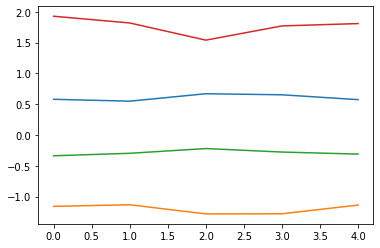

In [39]:
plt.plot(cl_model.cluster_centers_.T)

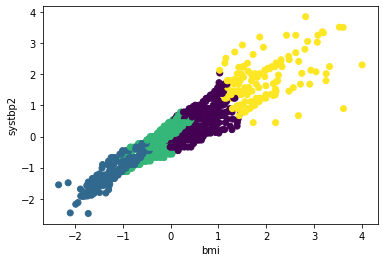

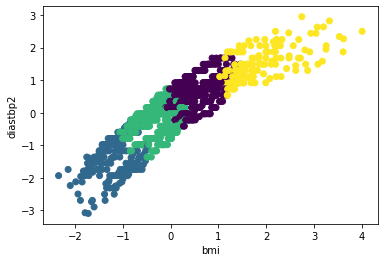

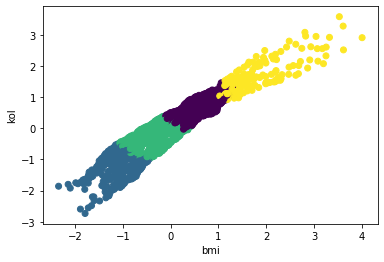

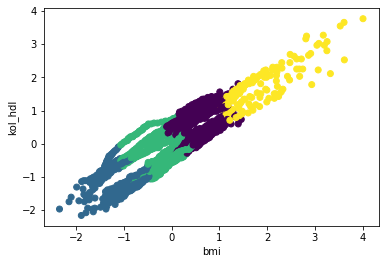

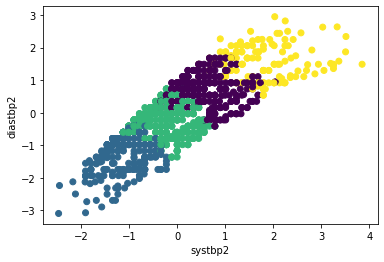

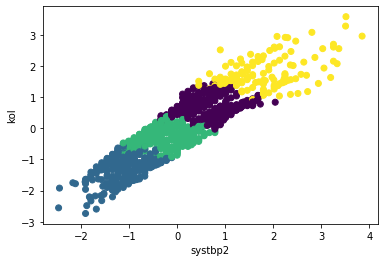

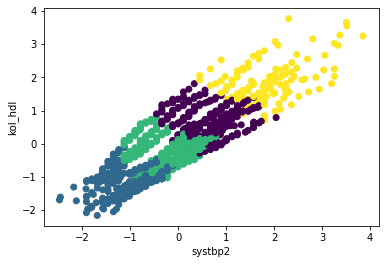

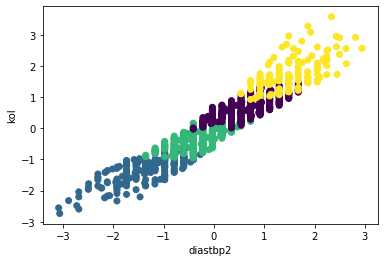

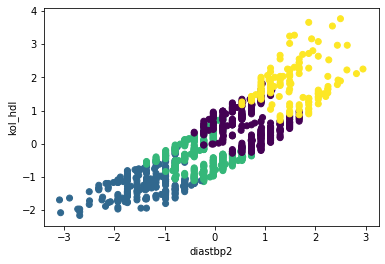

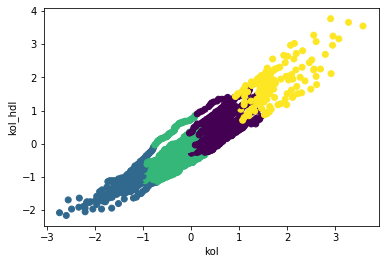

In [54]:
import itertools

for pair in itertools.combinations(list(data_normalized.columns), 2):
    fig, ax = plt.subplots()
    ax.scatter(x=data_normalized[pair[0]], y=data_normalized[pair[1]], c=cl_model.labels_)
    ax.set_xlabel(pair[0])
    ax.set_ylabel(pair[1])

Harjoitus 2. Kokeile jotain mallinvalintaan soveltuvaa mittaa, esim. Silhouette-menetelmää. Tee klusterimallit
eri määrille klustereita (esim 2,3,4,..,20) ja mittaa jokaisen ratkaisun hyvyyttä Silhoutte-menetelmällä. Visualisoi Silhoutte-indeksin eri arvot klustereiden määrän funcktiona (klustereiden määrä x-akselille, silhouette-indeksi y-akselille).

In [56]:
sklearn.metrics import silhouette_score

models = []

for i in range(2, 21):
    cl_model = kmeans(n_clusters=i, init='k-means++', random_state=42)
    cl_model.fit(data_normalized)
    models.append(cl_model)

silhouette_score()

[KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=42, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=42, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=42, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=42, tol=0.0001, verbose=0),
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
        n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
        random_state=42, tol=0.0001, verbose=0),
 KMeans(algorithm='auto',

Harjoitus 3. Lataa joku data opituista datalähteistä ja klusteroi se samalla tavalla. Normalisoi muuttujat ennen klusterointia, klusteroi ja käytä mallinvalintakriteeriä.